<a href="https://colab.research.google.com/github/ferperezh/IIC3633_ProyectoMetricaDiversidad/blob/main/musica_metrica_diversidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Métrica **Diversidad de Usuario** en la Música

## Importar los datos
Es necesario agregar el archivo "kaggle.json" disponible en el repositorio al entorno de archivos del Colab:
- https://github.com/ferperezh/IIC3633_ProyectoMetricaDiversidad/blob/main/kaggle.json

In [96]:
# Crear el directorio .kaggle en Colab
!mkdir -p ~/.kaggle

# Mover el archivo kaggle.json al directorio .kaggle
!cp kaggle.json ~/.kaggle/

# Cambiar los permisos del archivo kaggle.json para asegurar privacidad
!chmod 600 ~/.kaggle/kaggle.json

In [97]:
!pip install kaggle

In [98]:
# Descargar el dataset
!kaggle datasets download -d saurabhshahane/music-dataset-1950-to-2019

# Descomprimir el archivo zip descargado
import zipfile
with zipfile.ZipFile("music-dataset-1950-to-2019.zip", 'r') as zip_ref:
    zip_ref.extractall("music_dataset")

print("Path to dataset files: music_dataset")

Dataset URL: https://www.kaggle.com/datasets/saurabhshahane/music-dataset-1950-to-2019
License(s): Attribution 4.0 International (CC BY 4.0)
music-dataset-1950-to-2019.zip: Skipping, found more recently modified local copy (use --force to force download)
Path to dataset files: music_dataset


In [99]:
# Descargar el dataset de Last.fm
!kaggle datasets download -d harshal19t/lastfm-dataset

# Descomprimir el archivo zip descargado
import zipfile
with zipfile.ZipFile("lastfm-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("lastfm_dataset")

print("Path to dataset files: lastfm_dataset")

Dataset URL: https://www.kaggle.com/datasets/harshal19t/lastfm-dataset
License(s): copyright-authors
lastfm-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Path to dataset files: lastfm_dataset


## Procesamiento de Datasets Musicales
Considerar que se hace un join entre el `music_dataset` y `LastFM`, para obtener datos musicales que tienen metadata y datos de uso por diferentes usuarios.

In [100]:
import pandas as pd

music_data = pd.read_csv("music_dataset/tcc_ceds_music.csv")
lastfm = pd.read_csv("lastfm_dataset/Last.fm_data.csv")

In [101]:
#Crear la columna artist song que es el nombre del artista y el nombre de la cancion en minuscula
music_data['artist_song'] = music_data['artist_name'] + "-" + music_data['track_name']
music_data['artist_song'] = music_data['artist_song'].str.lower()

lastfm['artist_song'] = lastfm['Artist'] + "-" + lastfm['Track']
lastfm['artist_song'] = lastfm['artist_song'].str.lower()

In [102]:
# Ver los valores Nan
print(music_data.isnull().sum())
print(lastfm.isnull().sum())

Unnamed: 0                  0
artist_name                 0
track_name                  0
release_date                0
genre                       0
lyrics                      0
len                         0
dating                      0
violence                    0
world/life                  0
night/time                  0
shake the audience          0
family/gospel               0
romantic                    0
communication               0
obscene                     0
music                       0
movement/places             0
light/visual perceptions    0
family/spiritual            0
like/girls                  0
sadness                     0
feelings                    0
danceability                0
loudness                    0
acousticness                0
instrumentalness            0
valence                     0
energy                      0
topic                       0
age                         0
artist_song                 0
dtype: int64
Unnamed: 0      0
Username 

In [103]:
usuario_music_data = pd.merge(music_data, lastfm, on='artist_song', how='inner')
usuario_music_data

,Unnamed: 0_x,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,topic,age,artist_song,Unnamed: 0_y,Username,Artist,Track,Album,Date,Time
0,250,the clovers,devil or angel,1956,pop,devil mind like devil dear whichever miss miss...,35,0.001698,0.350897,0.001698,...,violence,0.914286,the clovers-devil or angel,78154,franhale,The Clovers,Devil or Angel,The Clovers,23 Jan 2021,12:44
1,331,eddie cochran,completely sweet,1957,pop,completely sweet baby completely sweet mean ma...,73,0.166586,0.001096,0.001096,...,romantic,0.900000,eddie cochran-completely sweet,117435,eartle,Eddie Cochran,Completely Sweet,Singin' to My Baby,30 Jan 2021,13:03
2,705,the byrds,turn! turn! turn! (to everything there is a se...,1959,pop,turn turn turn season turn turn turn time purp...,95,0.000684,0.106944,0.000684,...,night/time,0.871429,the byrds-turn! turn! turn! (to everything the...,80881,franhale,The Byrds,Turn! Turn! Turn! (To Everything There Is a Se...,Turn! Turn! Turn!,31 Jan 2021,13:31
3,729,fats domino,blueberry hill,1959,pop,thrill blueberry blueberry moon stand blueberr...,24,0.003096,0.003096,0.003096,...,romantic,0.871429,fats domino-blueberry hill,16025,Babs_05,Fats Domino,Blueberry Hill,Fats Domino Swings,02 Jan 2021,00:14
4,735,the platters,smoke gets in your eyes,1959,pop,ask know true true course reply inside deny sa...,45,0.001316,0.001316,0.001316,...,sadness,0.871429,the platters-smoke gets in your eyes,16020,Babs_05,The Platters,Smoke Gets In Your Eyes,Remember When?,02 Jan 2021,00:30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8100,82434,q-tip,life is better,2019,hip hop,life fill come fall away play bangin gonna ban...,36,0.001645,0.001645,0.440262,...,world/life,0.014286,q-tip-life is better,145081,massdosage,Q-Tip,Life Is Better,The Renaissance,31 Jan 2021,21:24
8101,82434,q-tip,life is better,2019,hip hop,life fill come fall away play bangin gonna ban...,36,0.001645,0.001645,0.440262,...,world/life,0.014286,q-tip-life is better,202988,Knapster01,Q-Tip,Life Is Better,The Renaissance,31 Jan 2021,21:24
8102,82439,rakim,when i b on tha mic,2019,hip hop,internationally know hardcore real niggas inte...,58,0.001754,0.001754,0.001754,...,obscene,0.014286,rakim-when i b on tha mic,138926,massdosage,Rakim,When I B On Tha Mic,The Master,31 Jan 2021,19:54
8103,82446,the roots,the seed (2.0),2019,hip hop,knock months finna know want neosoul hiphop wa...,61,0.001224,0.001224,0.105172,...,obscene,0.014286,the roots-the seed (2.0),6390,Babs_05,The Roots,The Seed (2.0),Phrenology,31 Jan 2021,23:55


In [104]:
usuario_music_data.columns

Index(['Unnamed: 0_x', 'artist_name', 'track_name', 'release_date', 'genre',
       'lyrics', 'len', 'dating', 'violence', 'world/life', 'night/time',
       'shake the audience', 'family/gospel', 'romantic', 'communication',
       'obscene', 'music', 'movement/places', 'light/visual perceptions',
       'family/spiritual', 'like/girls', 'sadness', 'feelings', 'danceability',
       'loudness', 'acousticness', 'instrumentalness', 'valence', 'energy',
       'topic', 'age', 'artist_song', 'Unnamed: 0_y', 'Username', 'Artist',
       'Track', 'Album', 'Date', 'Time'],
      dtype='object')

## Categorización de cada usuario
Obtenemos el top k=5 de categorias de cada usuario

In [105]:
k = 5

user_genre_df = usuario_music_data[['Username', 'genre']]

# Calcular las k categorías más escuchadas por cada usuario
top_k_5_categories = (
    user_genre_df.groupby(['Username', 'genre'])
    .size()  # Contar ocurrencias de cada género por usuario
    .reset_index(name='count')  # Resetear índice y nombrar la columna de conteo
    .sort_values(['Username', 'count'], ascending=[True, False])  # Ordenar por usuario y luego por conteo descendente
    .groupby('Username')  # Agrupar por usuario para obtener los top-k
    .head(k)  # Tomar los K géneros más escuchados por usuario
)

# Mostrar los resultados
print("Top k = 5 géneros más escuchados por usuario:")
top_k_5_categories

Top k = 5 géneros más escuchados por usuario:


,Username,genre,count
4,Babs_05,pop,915
6,Babs_05,rock,576
0,Babs_05,blues,112
3,Babs_05,jazz,90
1,Babs_05,country,24
11,Knapster01,pop,688
13,Knapster01,rock,403
7,Knapster01,blues,82
10,Knapster01,jazz,79
8,Knapster01,country,45


# Generar Recomendaciones

Se probará con diferentes métodos de recomendación para evaluar los resultados del modelo:


## Método Most Popular:
Recomienda las canciones más escuchadas en el conjunto global de datos de entrenamiento.
- Cuenta y ordena las canciones según número de reproducciones
- Selecciona las `k canciones` más populares
- Alta probabilidad de recomendar contenido con hartas visualizaciones
- Mismo resultado para todos los usuarios
- Baja diversidad de recomendaciones

### Procesamiento de Datos para Most Popular
Usar el metodo Most popular tomaremos las canciones descargadas/escuhadas por cada usuario como las canciones que quieren cada usaurio. Por lo que agregamos una columna llamada `Popularity` a la tabla de canciones que seria la cantidad de usaurios o veces que se descarga una cancion. Para luego recomendar canciones a cada usuario.

Usaremos la libreria `pyreclab`para aplicar el most popular y asi dividiremos los datos en train y test para aplicar el most popular.

In [106]:
data_music = usuario_music_data[["Username", "artist_song", "genre"]]

In [107]:
# Poner numeros a username para indentificarlos a los artist_song un numero
dict_username = {}
dict_username_reverse = {}
for i, username in enumerate(data_music['Username'].unique()):
    dict_username[username] = i
    dict_username_reverse[i] = username

dict_artist_song = {}
dict_artist_song_reverse = {}
for i, artist_song in enumerate(data_music['artist_song'].unique()):
    dict_artist_song[artist_song] = i
    dict_artist_song_reverse[i] = artist_song

In [108]:
data_music['user_id'] = data_music['Username'].map(dict_username)
data_music['artist_song_id'] = data_music['artist_song'].map(dict_artist_song)
data_music.head()

<ipython-input-108-75271913f1ae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_music['user_id'] = data_music['Username'].map(dict_username)
<ipython-input-108-75271913f1ae>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_music['artist_song_id'] = data_music['artist_song'].map(dict_artist_song)


,Username,artist_song,genre,user_id,artist_song_id
0,franhale,the clovers-devil or angel,pop,0,0
1,eartle,eddie cochran-completely sweet,pop,1,1
2,franhale,the byrds-turn! turn! turn! (to everything the...,pop,0,2
3,Babs_05,fats domino-blueberry hill,pop,2,3
4,Babs_05,the platters-smoke gets in your eyes,pop,2,4


In [109]:
from sklearn.model_selection import train_test_split

data_music_train = []
data_music_test = []

for user in data_music["user_id"].unique():
    user_data = data_music[data_music["user_id"] == user]
    train, test = train_test_split(user_data, test_size=0.2, random_state=42)
    data_music_train.append(train)
    data_music_test.append(test)


# Transformarlo a dataframe
data_music_train = pd.concat(data_music_train)
data_music_test = pd.concat(data_music_test)

In [110]:
data_music_test

,Username,artist_song,genre,user_id,artist_song_id
2604,franhale,peter bjorn and john-young folks,pop,0,973
5229,franhale,between the buried and me-melting city,jazz,0,1939
6266,franhale,faith no more-falling to pieces,rock,0,2360
1551,franhale,mariah carey-fantasy,pop,0,601
7952,franhale,i dont know how but they found me-do it all th...,rock,0,2984
...,...,...,...,...,...
3646,mremond,beach house-space song,pop,10,1283
6942,mremond,foo fighters-learn to fly,rock,10,2592
6745,mremond,depeche mode-home,rock,10,2534
1851,mremond,gillian welch-i'll fly away,pop,10,724


### Obtención de Top K Categorías

In [111]:
def get_top_k_categories(df, k):
  user_genre_df = df[['Username', 'genre']]

  # Calcular las k categorías más escuchadas por cada usuario
  top_k_5_categories = (
      user_genre_df.groupby(['Username', 'genre'])
      .size()  # Contar ocurrencias de cada género por usuario
      .reset_index(name='count')  # Resetear índice y nombrar la columna de conteo
      .sort_values(['Username', 'count'], ascending=[True, False])  # Ordenar por usuario y luego por conteo descendente
      .groupby('Username')  # Agrupar por usuario para obtener los top-k
      .head(k)  # Tomar los K géneros más escuchados por usuario
  )

  return top_k_5_categories

### Recomendación de Most Popular

In [112]:
def recommend_most_popular(user, data_train, k=10):
  # Agrugar por canciones contando la cantidad de apariciones
  data_song_count = data_train.groupby('artist_song_id')['artist_song_id'].count().reset_index(name='popularity')
  # Colocar los nombres de las canciones
  data_song_count['artist_song'] = data_song_count['artist_song_id'].map(dict_artist_song_reverse)


  # Ordenar por popularity
  data_song_count = data_song_count.sort_values('popularity', ascending=False)
  top_k_popular_artist_song = data_song_count.head(k)

  top_k_popular_artist_song = top_k_popular_artist_song['artist_song'].tolist()

  return top_k_popular_artist_song



## Método Random
Recomienda canciones de manera aleatoria del conjunto de entrenamiento.
- Selecciona `k` canciones aleatorias
- Usado como baseline para comparaciones
- Debiese mostrar un aumento en la diversidad de las recomendaciones

In [113]:
import random

def recommend_random(user, data_train, k=10):
  # Obtener todas las canciones unicas
  unique_songs = data_train['artist_song_id'].unique()

  # Seleccionar k canciones aleatorias
  random_songs = random.sample(list(unique_songs), min(k, len(unique_songs)))

  return random_songs



## Método Colaborativo basado en Géneros
Recomienda canciones basandose en los géneros preferidos del usuario y la similtud con otros usuarios que escuchan géneros similares.

Basado en el [Siguiente Ejemplo de RPubs](https://rpubs.com/erictria/collaborative-filtering)

- Crea perfiles de usuarios basado en sus preferencias de generos
- Usa `similitud coseno` entre los perfiles
- Recomienda canciones de usuarios similares que no han sido escuchadas por el usuario actual




In [133]:
from collections import defaultdict
from sklearn.metrics.pairwise import cosine_similarity
def recommend_collaborative(user, data_train, k=10):
  # Obtener username
  username = dict_username_reverse[user]

  # Creamos perfil de géneros del usuario
  user_genres = defaultdict(int)
  user_songs = data_train[data_train['Username'] == username]

  for _, row in user_songs.iterrows():
    user_genres[row['genre']] += 1

  # Normalizamos los géneros según las frecuencias de canciones
  total_songs = sum(user_genres.values())
  if total_songs > 0:
    for genre in user_genres:
      user_genres[genre] /= total_songs

  # Encontrar usuarios similares basados en géneros compartidos entre usuarios
  user_similarities = {}
  for other_user in data_train['Username'].unique():
    if other_user != username:
      other_user_genres = defaultdict(int)
      other_songs = data_train[data_train['Username'] == other_user]

      # Creamos perfil del otro usuario
      for _, row in other_songs.iterrows():
        other_user_genres[row['genre']] += 1

      # Normalizamos los géneros según las frecuencias de canciones
      other_total_songs = sum(other_user_genres.values())
      if other_total_songs > 0:
        for genre in other_user_genres:
          other_user_genres[genre] /= other_total_songs

      # Calculamos la similitud coseno
      total_generos = set(list(user_genres.keys()) + list(other_user_genres.keys()))
      vector_user = [user_genres.get(genre, 0) for genre in total_generos]
      vector_other_user = [other_user_genres.get(genre, 0) for genre in total_generos]

      similarity = cosine_similarity([vector_user], [vector_other_user])[0][0]
      user_similarities[other_user] = similarity

  # Obtenemos las canciones de usuarios similares
  recommended_songs = defaultdict(int)
  for other_user, similarity in sorted(user_similarities.items(), key=lambda x: x[1], reverse=True)[:5]:
    other_user_songs = data_train[data_train['Username'] == other_user]['artist_song_id'].unique()
    for song in other_user_songs:
      recommended_songs[song] += similarity

  # Filtramos las canciones que ya a escuchado el usuario
  user_listened = set(user_songs['artist_song_id'])
  recommended_songs = {song: score for song, score in recommended_songs.items()
                        if song not in user_listened}

  # Retornar las top k canciones recomendadas
  top_recommendations = sorted(recommended_songs.items(), key=lambda x: x[1], reverse=True)
  return [song for song, _ in top_recommendations[:k]]


## Método Híbrido
Método híbrido que combina popularidad con similtud de géneros según parámetro `alpha`.

Basado parcialmente en el [Siguiente Articulo](https://marketsy.ai/blog/hybrid-recommender-systems-beginners-guide).

- `alpha`: Parámetro para balancear entre popularidad global (`1-alpha`) y preferencias de género del usuario (`alpha`)
- Balance entre descubrimiento y relevancia de la recomendación



In [134]:
def recommend_hybrid(user, data_train, k=10, alpha=0.5):
  # Calcular los scores de popularidad de canciones
  popularity_scores = data_train.groupby('artist_song_id')['user_id'].count().to_dict()
  max_popularity = max(popularity_scores.values())
  min_popularity = min(popularity_scores.values())
  normalized_popularity = {song: count/max_popularity for song, count in popularity_scores.items()}

  # Obtener los generos preferidos del usuario
  user_songs = data_train[data_train['user_id'] == user]
  user_genres = user_songs['genre'].value_counts().to_dict()
  total_user_songs = sum(user_genres.values())
  prefered_user_genres = {genre: count/total_user_songs for genre, count in user_genres.items()}

  # Calcular el score combinado hibrido
  hybrid_scores = {}
  for song in data_train['artist_song'].unique():
    # Score de popularidad
    song_popularity = normalized_popularity.get(song, 0)

    # Score de genero
    song_genres = data_train[data_train['artist_song'] == song]['genre'].iloc[0]
    genre_score = prefered_user_genres.get(song_genres, 0)

    # Combinar Scores de popularidad y genero
    hybrid_scores[song] = (1-alpha) * song_popularity + (alpha) * genre_score

  # Filtrar las canciones ya escuchadas
  user_listened = set(user_songs['artist_song_id'])
  hybrid_scores = {song: score for song, score in hybrid_scores.items()
                    if song not in user_listened}

  # Retornar las top k canciones recomendadas
  top_recommendations = sorted(hybrid_scores.items(), key=lambda x: x[1], reverse=True)
  return [song for song, _ in top_recommendations[:k]]

# Calculamos Métricas:


## Metricas de Precisión
- MAP
- NDCG@5


In [135]:
def calculate_map(test_data, user_recommendation, user):
  relevant_items = test_data[test_data['user_id'] == user]['artist_song'].tolist()

  # Inicializar variables
  precision_sum = 0
  relevant_count = 0

  for i, item in enumerate(user_recommendation, start=1):
    if item in relevant_items:
      relevant_count += 1
      precision_sum += relevant_count / i

  if relevant_count > 0:
    map_value = precision_sum / relevant_count
  else:
    map_value = 0

  return map_value


In [136]:
import math

def calculate_ndcg(test_data, user_recommendation, user):
  relevant_items = test_data[test_data['user_id'] == user]['artist_song'].tolist()

  # Calcular DCG e IDCG
  dcg = 0
  idcg = 0
  for i, item in enumerate(user_recommendation, start=1):
    if item in relevant_items:
      dcg += 1 / math.log2(i + 1)
    idcg += 1 / math.log2(i + 1)

  # Calcular NDCG
  if idcg > 0:
    ndcg_value = dcg / idcg
  else:
    ndcg_value = 0

  return ndcg_value



## Métricas de Diversidad: ¡Enfoque del Estudio!
- **User Diversity**: Métrica propuesta por la investigación
- Long Tail
- Shannon Entropy
- Intra List Diversity
- Diversity Coverage
- Inverse Propensity Score

### Definición de **USER DIVERSITY**, la métrica de la investigación.
1. `UD = 1 - (|∑{j=1...k}[(R_j/R)*log(R_j/R)]| / log(k))`
2. `k`: número de categorías para un usuario.
3. `R`: número total de recomendaciones.
4. `(R_j/R)`: Proporción de recomendaciones del usuario que pertenecen a la categoría `j`
5. `log(...)`: para penalizar concentración excesiva en una sola categoría.
6. `/ log(k)`: normaliza el valor.
7. `1 - `: Valor resultante entre 0 y 1.
8. *Valor alto*: alta diversidad en las recomendaciones recibidas por el usuario (pertenecen a varias categorías favoritas)

In [137]:
import math

def calculate_user_diversity(user_top_categories, user_recommendation, user_id, k=5):
    user = dict_username_reverse[user_id]
    # Obtener las top k categorías del usuario
    categories_user = user_top_categories[user_top_categories['Username'] == user]['genre'].tolist()[:k]

    # Filtrar recomendaciones para géneros relevantes
    filtered_recommendations = [
        rec for rec in user_recommendation
        if rec in music_data[music_data['genre'].isin(categories_user)]['artist_song'].tolist()
    ]

    # Total de recomendaciones relevantes
    r = len(filtered_recommendations)
    if r == 0:
        return 0.0  # Si no hay recomendaciones relevantes, diversidad es 0.

    # Filtrar datos de música para las canciones recomendadas relevantes
    filtered_data = music_data[music_data['artist_song'].isin(filtered_recommendations)]

    # Calcular sum_diversity
    sum_diversity = 0
    for genre in categories_user:
        recommended_songs_genre = filtered_data[filtered_data['genre'] == genre]
        r_j = len(recommended_songs_genre)

        if r_j > 0:
            proportion = r_j / r
            contribution = proportion * math.log(proportion)
            sum_diversity += contribution

    # Normalizar con log(k)
    max_diversity = math.log(k) if k > 1 else 1.0
    # Ponemos en valor absoluto sum_diversity
    sum_diversity = abs(sum_diversity)

    if max_diversity == 0:
        return 0.0  # Si k <= 1, diversidad no tiene sentido

    # Calcular diversidad final
    diversity = 1 - (sum_diversity / max_diversity)

    # Depuración adicional
    return diversity


### **Long Tail**:
Mide que tan diversas son las recomendaciones en términos de popularidad de los items.
1.  Equación: `LT = |Intersection(Rec, TailItems)| / |Rec|`
2. Parametro `beta=0.4`: define umbral para considerar item como parte de la cola larga.
3. *Valor alto*: se recomiendan más items poco populares



In [138]:
def calculate_long_tail(test_data, user_recommendation, user_id, beta_value=0.5):
    # Total de recomendaciones relevantes
    r = len(user_recommendation)
    if r == 0:
        return 0.0  # Si no hay recomendaciones relevantes, diversidad es 0.

    # Procesamos las recomendaciones para obtener la popularidad de los items:
    item_popularity = test_data['artist_song'].value_counts().to_dict()

    # Ordenamos los items por popularidad
    sorted_items = sorted(item_popularity.items(), key=lambda x: x[1], reverse=True)
    n_items = len(sorted_items)
    tail_max = int(beta_value * n_items)

    # Identificamos los items en la LT
    long_tail = set(item for item, _ in sorted_items[tail_max:])

    # Calculamos la proporcion de items recomendades nen la cola larga
    longtail_recommendation = sum(1 for item in user_recommendation if item in long_tail)

    return longtail_recommendation / r


### **Entropía de Shannon**:
Mide la incertidumbre o aleatoriedad de la distribución de recomendaciones.
1. `H = -∑(pi*log2(pi)) / log2(n)`
2. `pi`: probabilidad de cada item en las recomendaciones
3. *Valor alto*: mayor aleatoriedad/diversidad en las recomendaciones.



In [139]:
def calculate_shannon_entropy(test_data, user_recommendation, user_id):
    # Total de recomendaciones relevantes
    r = len(user_recommendation)
    if r == 0:
        return 0.0  # Si no hay recomendaciones relevantes, diversidad es 0.

    # Obtener genero de las canciones recomendadas
    rec_genres = [
        test_data[test_data['artist_song'] == rec]['genre'].iloc[0]
        for rec in user_recommendation
        if len(test_data[test_data['artist_song'] == rec]) > 0
    ]

    # Si no hay generos recomendados, devolver 0
    if len(rec_genres) == 0:
        return 0.0

    # Contar la frecuencia de cada genero
    genre_counts = {genre: rec_genres.count(genre) for genre in set(rec_genres)}
    frecuencies = [count/r for count in genre_counts.values()]

    # Calcular la entropia
    entropy = -sum(p * math.log(p, 2) for p in frecuencies)

    # Normalizar con log(r)
    max_entropy = math.log(r) if r > 1 else 1.0
    entropy /= max_entropy

    return entropy

### **Intra List Diversity**:
Calcula diversidad basándose en la similitud entre los items.
1. `ILD = ∑∑(d(i,j)) / (n*(n-1)/2)`
2. `d(i,j)`: es la distancia entre los items `i` y `j`, usando coseno
3. *Valor alto*: mayor diversidad entre los items recomendados.



In [140]:
import numpy as np
def calculate_intra_list_diversity(test_data, user_recommendation, user_id):
    # Total de recomendaciones relevantes
    r = len(user_recommendation)
    if r < 2:
        return 0.0

    # Crear one-hot-encoding de caracteristicas basados en generos
    unique_genres = test_data['genre'].unique()
    one_genres = {genre: id_genre for id_genre, genre in enumerate(unique_genres)}

    # Creamos los vectores one_hot
    genre_vectors = []
    for song in user_recommendation:
        song_data = test_data[test_data['artist_song'] == song]
        if len(song_data) > 0:
            genre = song_data['genre'].iloc[0]
            one_hot = [1 if one_genres[genre] == i else 0 for i in range(len(unique_genres))]
            genre_vectors.append(one_hot)

    # Si no hay recomendaciones relevantes, devolver 0
    if len(genre_vectors) < 2:
        return 0.0

    # Calcular matriz de distancias usando distancia coseno
    feature_vectors = np.array(genre_vectors)
    distances = np.dot(feature_vectors, feature_vectors.T)

    # Calcular la diversidad intra-list, considerando la distancia coseno
    n = len(feature_vectors)
    comparisons = (n * (n - 1)) / 2
    intra_list_diversity = np.sum(distances) / (2 * comparisons)

    return intra_list_diversity


### **Diversity Coverage**:
Mide la cobertura como la proporción de items únicos recomendados respceto al total de items posibles.
1. `DC = |Unique_Rec| / |All Items|`
2. *Valor alto*: se están recomendando items de todo el catálogo



In [141]:
def calculate_diversity_coverage(test_data, user_recommendation, user_id):
    # Total de recomendaciones relevantes
    r = len(user_recommendation)
    if r == 0:
        return 0.0  # Si no hay recomendaciones relevantes, diversidad es 0.

    # Obtener generos unicos de las canciones recomendadas
    rec_genres = set(
        test_data[test_data['artist_song'] == rec]['genre'].iloc[0]
        for rec in user_recommendation
        if len(test_data[test_data['artist_song'] == rec]) > 0
    )

    # Si no hay generos recomendados, devolver 0
    if len(rec_genres) == 0:
        return 0.0

    # Obtener todos los posibles generos
    all_genres = set(test_data['genre'].unique())

    # Calcular la cobertura de la diversidad
    diversity_coverage = len(rec_genres) / len(all_genres)

    return diversity_coverage

### **Inverse Propensity Score** (IPS):
Penaliza la recomendación de items muy populares
1. `IPS = (1/p(i))`
2. Parametro `lambda` para suavizar la propensidad
3. `p(i)`: probabilidad que el item `i` sea seleccionado
4. *Valor alto*: se están recomendando más items poco probables.

In [142]:
def calculate_inverse_propensity_score(test_data, user_recommendation, user_id, lambda_value=0.5):
    # Total de recomendaciones relevantes
    r = len(user_recommendation)
    if r == 0:
        return 0.0  # Si no hay recomendaciones relevantes, diversidad es 0

    # Calcular popularidad de las canciones
    song_popularity = test_data['artist_song'].value_counts().to_dict()
    interaction_count = sum(song_popularity.values())

    # Calcular Propensity Score
    prop_score = {
        song: ((song_popularity[song] + lambda_value) / (interaction_count + lambda_value))
        for song, count in song_popularity.items()
    }

    # Calcular IPS promedio
    ips = [1 / prop_score[song] for song in user_recommendation if song in prop_score]
    if len(ips) > 0:
        ips_avg = sum(ips) / len(ips)
        return ips_avg
    else:
        return 0.0

# Ejecución Método Most Popular. PROBAR: Random y Collaborative

Creamos una función para ejecutar el modelo con parametros modificables correspondientes a:
- `test_data`: Datos para testeo del modelo
- `train_data`: Datos para entrenamiento del modelo
- `top_n`: Para recommendación *Most Popular*
- `k`: Cuantos clusters de géneros se considerarán para los usuarios
- `beta_lt`: Parametro beta de métrica *Long Tail*, define umbral para considerar un item como parte de la *Long Tail*
- `lambda_ips`: Parámetro de métrica *Inverse Propensity Score*, sirve para suavizar el resultado.


In [143]:
def most_popular_metrics(test_data, train_data, top_n, k, beta_lt=0.4, lambda_ips=0.5):
  map_sum = 0
  ndcg_sum = 0
  diversity_sum = 0
  lt_sum = 0
  entropy_sum = 0
  ild_sum = 0
  dc_sum = 0
  ips_sum = 0
  user_count = 0


  top_k_categories_data = get_top_k_categories(test_data, k)

  for userid in test_data['user_id'].unique():

    recommend_list = recommend_most_popular(userid, train_data, top_n)

    user = dict_username_reverse[userid]
    #print(f"User: {user} - Recommended: {recommend_list}")

    # Calcular Map y nDCG y User Diversity
    map_user = calculate_map(test_data, recommend_list, userid)
    ndcg_user = calculate_ndcg(test_data, recommend_list, userid)
    diversity_user = calculate_user_diversity(top_k_categories_data, recommend_list, userid)
    lt_user = calculate_long_tail(test_data, recommend_list, userid, beta_lt)
    entropy_user = calculate_shannon_entropy(test_data, recommend_list, userid)
    ild_user = calculate_intra_list_diversity(test_data, recommend_list, userid)
    dc_user = calculate_diversity_coverage(test_data, recommend_list, userid)
    ips_user = calculate_inverse_propensity_score(test_data, recommend_list, userid, lambda_ips)

    #print(f"Map: {map_user}")
    #print(f"nDCG: {ndcg_user}")
    #print(f"Diversity: {diversity_user}")

    map_sum += map_user
    ndcg_sum += ndcg_user
    diversity_sum += diversity_user
    lt_sum += lt_user
    entropy_sum += entropy_user
    ild_sum += ild_user
    dc_sum += dc_user
    ips_sum += ips_user
    user_count += 1

  # Promedio de métricas
  map_avg = map_sum / user_count
  ndcg_avg = ndcg_sum / user_count
  diversity_avg = diversity_sum / user_count
  lt_avg = lt_sum / user_count
  entropy_avg = entropy_sum / user_count
  ild_avg = ild_sum / user_count
  dc_avg = dc_sum / user_count
  ips_avg = ips_sum / user_count

  return {
      "MAP": map_avg,
      "nDCG": ndcg_avg,
      "User_Diversity": diversity_avg,
      "Long_Tail": lt_avg,
      "Shannon_Entropy": entropy_avg,
      "Intra_List_Diversity": ild_avg,
      "Diversity_Coverage": dc_avg,
      "Inverse_Propensity_Score": ips_avg
  }


## Ejecución y obtención de métricas


In [144]:
metric_results = most_popular_metrics(data_music_test, data_music_train, 10, 5, beta_lt=0.4, lambda_ips=0.5)
print(f"MAP: {metric_results['MAP']}")
print(f"nDCG: {metric_results['nDCG']}")
print(f"User_Diversity: {metric_results['User_Diversity']}")
print(f"Long_Tail: {metric_results['Long_Tail']}")
print(f"Shannon_Entropy: {metric_results['Shannon_Entropy']}")
print(f"Intra_List_Diversity: {metric_results['Intra_List_Diversity']}")
print(f"Diversity_Coverage: {metric_results['Diversity_Coverage']}")
print(f"Inverse_Propensity_Score: {metric_results['Inverse_Propensity_Score']}")

MAP: 0.31029942279942285
nDCG: 0.23446691335535422
User_Diversity: 0.4262802266288572
Long_Tail: 0.0
Shannon_Entropy: 0.6576289144707822
Intra_List_Diversity: 0.40277777777777773
Diversity_Coverage: 0.4285714285714285
Inverse_Propensity_Score: 361.02719256052586


# Ejecución Global de Métodos

In [145]:
def global_metrics(test_data, train_data, top_n, k, alpha_hybrid=0.5, beta_lt=0.4, lambda_ips=0.5):

  # Arreglo para almacenar los resultados de cada metodo
  records = []

  # Obtenemos las top k categorias
  top_k_categories_data = get_top_k_categories(test_data, k)

  for userid in test_data['user_id'].unique():
    # Genero recomendaciones para cada modelo
    recommendations = {
        'most_popular': recommend_most_popular(userid, train_data, top_n),
        'random': recommend_random(userid, train_data, top_n),
        'collaborative': recommend_collaborative(userid, train_data, top_n),
        'hybrid': recommend_hybrid(userid, train_data, top_n, alpha_hybrid),
    }

    # Calcular Metricas para cada modelo
    for model, recommend_list in recommendations.items():
      record = {
        'user_id': userid,
        'model': model,
          # Metricas de precision
        'MAP': calculate_map(test_data, recommend_list, userid),
        'nDCG': calculate_ndcg(test_data, recommend_list, userid),
          # Metricas de diversidad
        'User_Diversity': calculate_user_diversity(top_k_categories_data, recommend_list, userid),
        'Long_Tail': calculate_long_tail(test_data, recommend_list, userid, beta_lt),
        'Shannon_Entropy': calculate_shannon_entropy(test_data, recommend_list, userid),
        'Intra_List_Diversity': calculate_intra_list_diversity(test_data, recommend_list, userid),
        'Diversity_Coverage': calculate_diversity_coverage(test_data, recommend_list, userid),
        'Inverse_Propensity_Score': calculate_inverse_propensity_score(test_data, recommend_list, userid, lambda_ips)
      }
      records.append(record)

  # Promedio de métricas
  results_df = pd.DataFrame(records)
  print(results_df.head())

  return results_df


## Analisis Global de Metricas
Analiza y visualiza los resultados de las métricas globales usando el Dataframe

### Generar visualizaciones comparativas entre los modelos
Creamos 3 tipos de gráficos para las visualizaciones:
1. Gráfico de cajas para cada métrica mostrando su distribución.
2. Heatmap de correlaciones entre métricas.
3. Gráfico de radar para comparar modelos.

In [151]:
import seaborn as sns
import matplotlib.pyplot as plt

def visualize_global_metrics(results_df):
  metrics = ['MAP', 'nDCG', 'User_Diversity', 'Long_Tail', 'Shannon_Entropy', 'Intra_List_Diversity', 'Diversity_Coverage', 'Inverse_Propensity_Score']

  # Configurar el estilo usando seaborn
  sns.set_style

  # Crear el gráfico de cajas para cada metrica
  fig, axes = plt.subplots(2, 4, figsize=(20, 10))
  fig.suptitle('Distribución de Métricas por Modelo', fontsize=16)

  for i, metric in enumerate(metrics):
    row = i // 4
    col = i % 4
    ax = axes[row, col]
    sns.boxplot(x='model', y=metric, data=results_df, ax=axes[row, col])
    axes[row, col].set_xticklabels(axes[row, col].get_xticklabels(), rotation=45)
    ax.set_title(metric)
    ax.set_xlabel('Modelo')
    ax.set_ylabel(metric)

  plt.tight_layout()
  plt.show()

  # Generar heatmap de correlaciones entre métricas
  correlation_matrix = results_df[metrics].corr()
  plt.figure(figsize=(12, 8))
  sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
  plt.title('Correlación entre Métricas')
  plt.tight_layout()
  plt.show()

  # Grafico de radar para comparar modelos
    # Calcular promedios de las metricas normalizados
  avg_metrics = results_df.groupby('model')[metrics].mean()
  normalized_metrics = (avg_metrics - avg_metrics.min()) / (avg_metrics.max() - avg_metrics.min())

    # Configuramos grafico de radar: https://plotly.com/python/radar-chart/
  fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
  angles = np.linspace(0, 2 * np.pi, len(metrics), endpoint=False)
  angles = np.concatenate((angles, [angles[0]]))

    # Graficamos las metricas
  for model in normalized_metrics.index:
    values = np.concatenate((normalized_metrics.loc[model], [normalized_metrics.loc[model][0]]))
    ax.plot(angles, values, 'o-', linewidth=2, label=model)
    ax.fill(angles, values, alpha=0.25)

    # Configuramos etiquetas
  ax.set_xticks(angles[:-1], metrics)
  ax.set_ylim(0, 1)
  plt.legend(loc='best', bbox_to_anchor=(0.5, -0.05))
  plt.title('Comparación de Métodos según Métricas Normalizadas')
  # plt.tight_layout()
  plt.show()

### Generar Análisis Estadístico de Significancia
Realiza un análisis estadístico de las diferencias entre modelos, incluyendo:
1. Media y desviación estándar por modelo.
2. Test ANOVA para evaluar la significancia estadística
3. Correlaciones entre las métricas


In [147]:
from scipy import stats

def analyze_significance(results_df):
  metrics = ['MAP', 'nDCG', 'User_Diversity', 'Long_Tail', 'Shannon_Entropy', 'Intra_List_Diversity', 'Diversity_Coverage', 'Inverse_Propensity_Score']
  # Calcular promedios de las metricas
  avg_metrics = results_df.groupby('model').mean()
  print("Promedios de Métricas por modelo:")
  print(avg_metrics.round(4))

  # Calcular desviaciones estandar
  std_metrics = results_df.groupby('model').std()
  print("Desviaciones estandar de Métricas por modelo:")
  print(std_metrics.round(4))

  # Calcular Test de ANOVA
  # Generamos grupos de comparacion segun modelos
  anova_results = {}
  for metric in metrics:
    groups = [group for _, group in results_df.groupby('model')[metric]]
    f_value, p_value = stats.f_oneway(*groups)
    anova_results[metric] = {'Estadistico-F': f_value, 'Valor-P': p_value}

  # Creo un dataframe con los resultados
  anova_df = pd.DataFrame(anova_results).T
  print("Resultados ANOVA:")
  print(anova_df.round(4))


## Generar Resultados Finales

In [148]:
def analyze_global_metrics(results_df):
  # Preparar e imprimir las visualizaciones usando nuestra funcion
  visualize_global_metrics(results_df)

  # Analisis estadistico usando nuestra funcion
  analyze_significance(results_df)

### **FALTA POR IMPLEMENTAR**: Testeo de Parámetros para Ejecución Global
Queda ejecutado con parámetros:
- top_n = 10
- k = 5
- alpha_hybrid=0.5
- beta_lt=0.4
- lambda_ips=0.5


   user_id          model       MAP      nDCG  User_Diversity  Long_Tail  \
0        0   most_popular  0.844444  0.752969        0.344541        0.0   
1        0         random  0.000000  0.000000        0.000000        0.0   
2        0  collaborative  0.000000  0.000000        0.000000        0.0   
3        0         hybrid  0.111111  0.066254        1.000000        0.2   
4        1   most_popular  0.250000  0.164220        0.344541        0.0   

   Shannon_Entropy  Intra_List_Diversity  Diversity_Coverage  \
0         0.657629              0.402778            0.428571   
1         0.000000              0.000000            0.000000   
2         0.000000              0.000000            0.000000   
3         0.217147              1.250000            0.142857   
4         0.657629              0.402778            0.428571   

   Inverse_Propensity_Score  
0                361.027193  
1                  0.000000  
2                  0.000000  
3                824.093333  
4       

<ipython-input-151-48dcd41c7dc2>:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[row, col].set_xticklabels(axes[row, col].get_xticklabels(), rotation=45)
<ipython-input-151-48dcd41c7dc2>:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[row, col].set_xticklabels(axes[row, col].get_xticklabels(), rotation=45)
<ipython-input-151-48dcd41c7dc2>:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[row, col].set_xticklabels(axes[row, col].get_xticklabels(), rotation=45)
<ipython-input-151-48dcd41c7dc2>:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[row, col].set_xticklabels(axes[row, col].get_xticklabels(), rotation=45)
<ipython-input-151-4

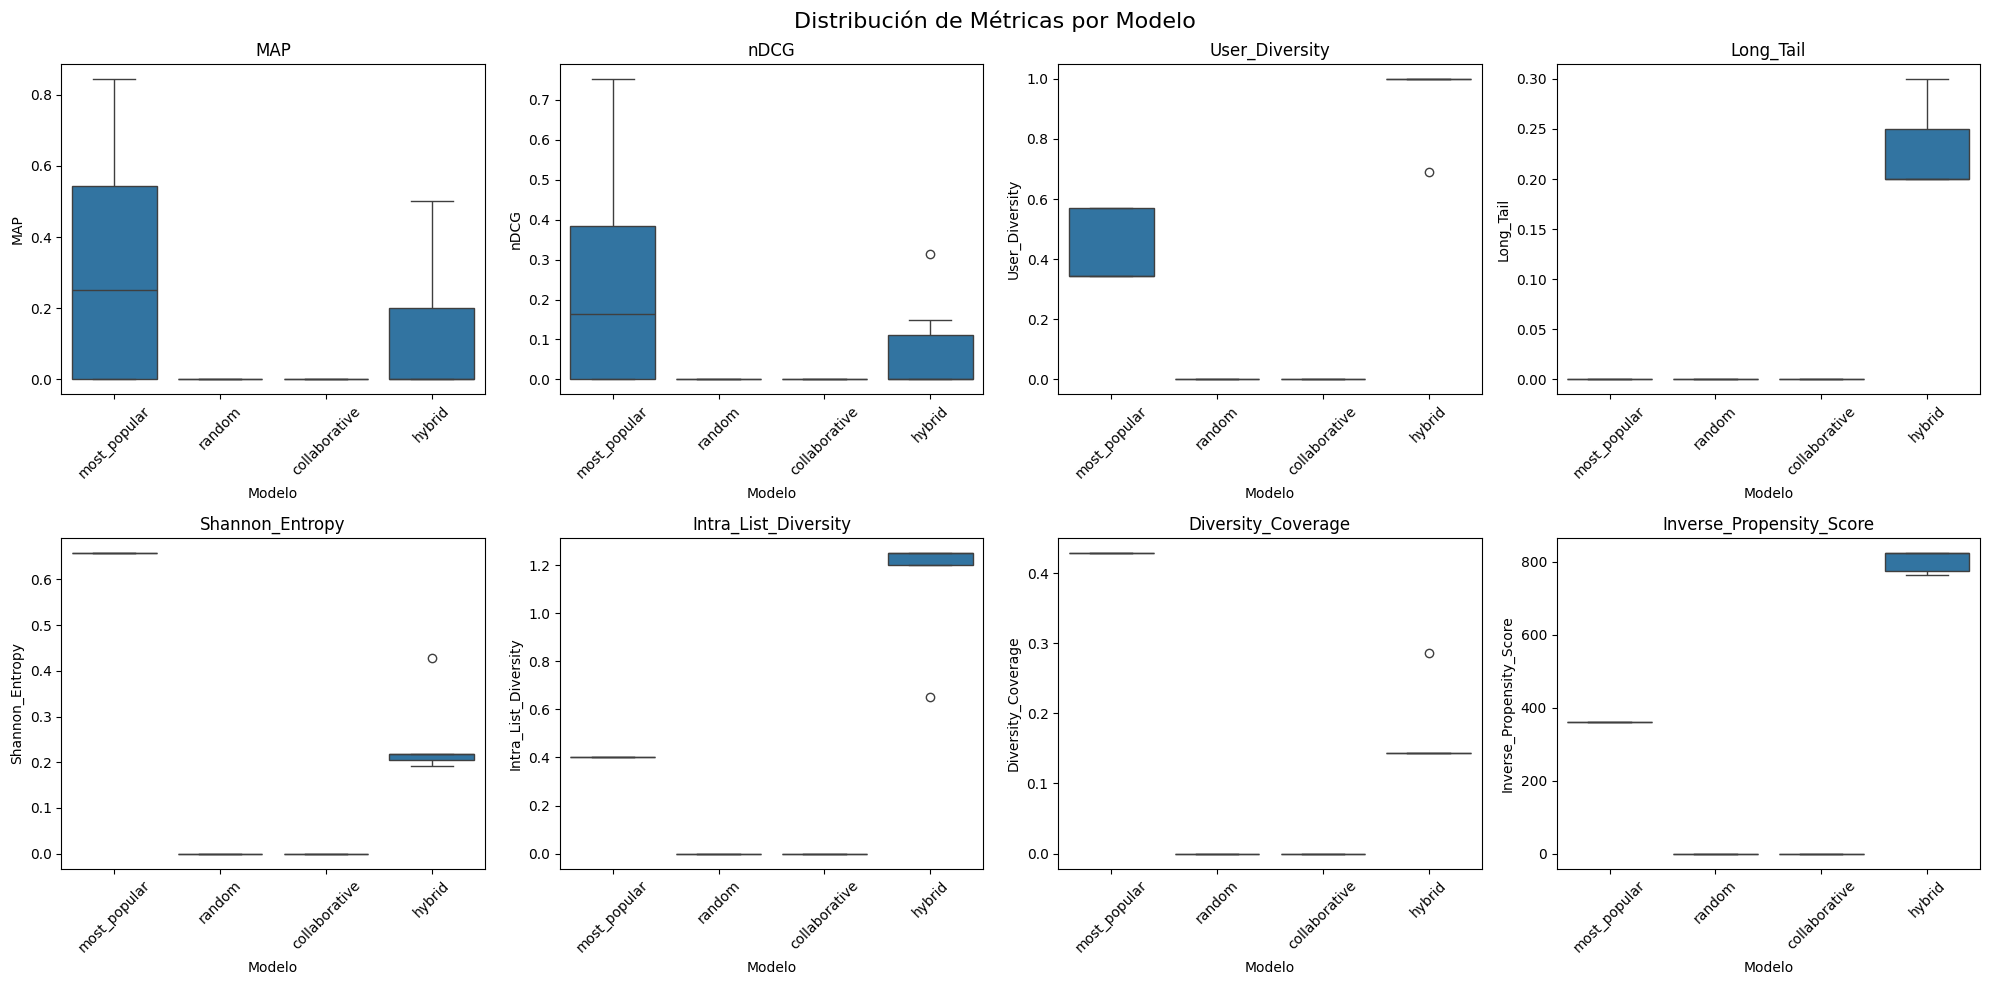

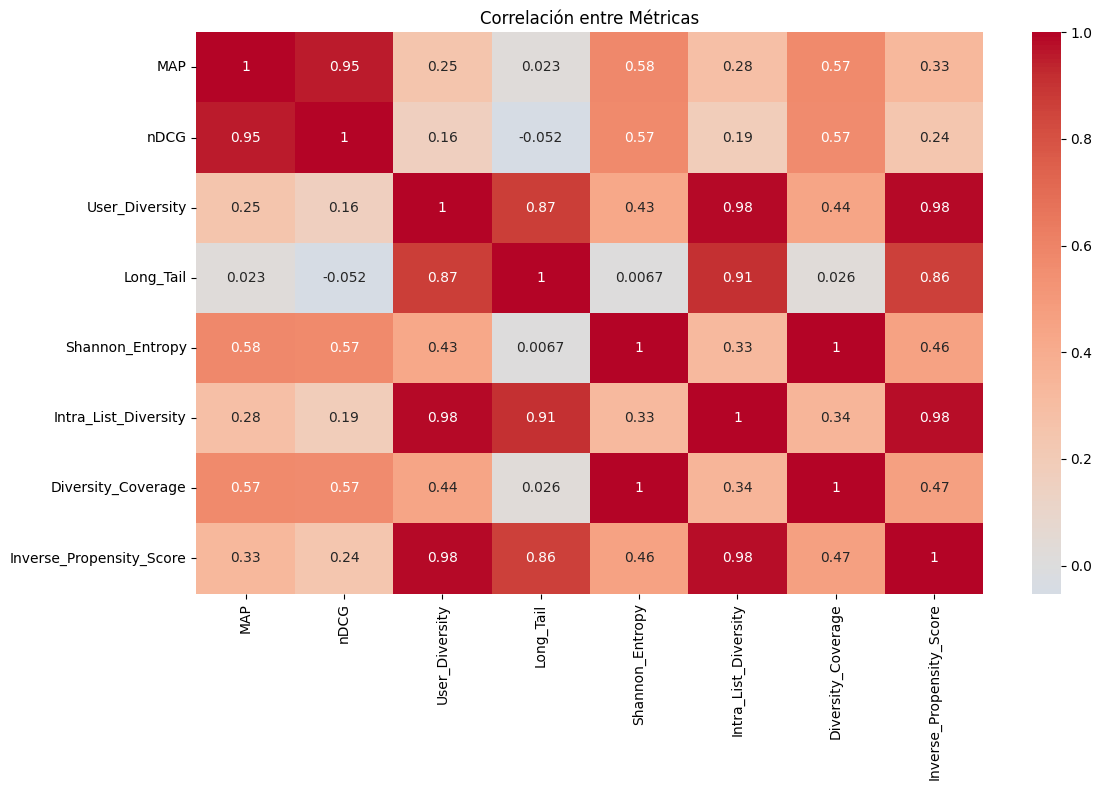

<ipython-input-151-48dcd41c7dc2>:47: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  values = np.concatenate((normalized_metrics.loc[model], [normalized_metrics.loc[model][0]]))


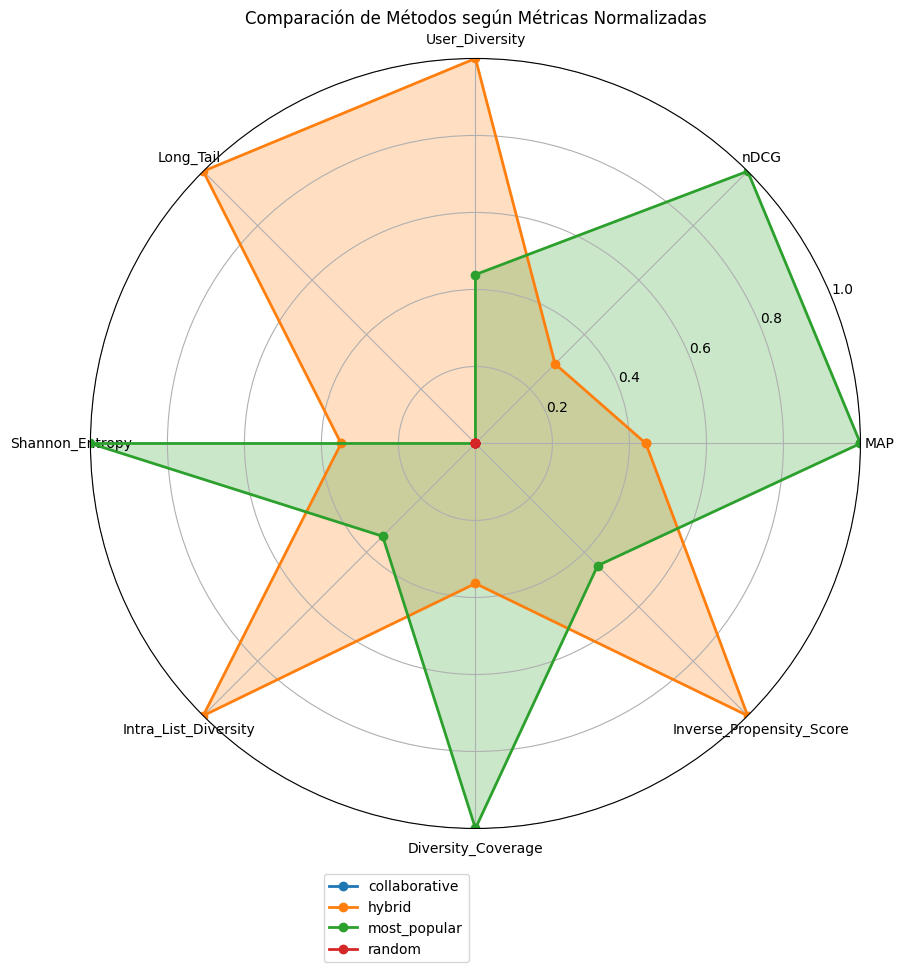

Promedios de Métricas por modelo:
               user_id     MAP    nDCG  User_Diversity  Long_Tail  \
model                                                               
collaborative      5.0  0.0000  0.0000          0.0000     0.0000   
hybrid             5.0  0.1374  0.0686          0.9717     0.2273   
most_popular       5.0  0.3103  0.2345          0.4263     0.0000   
random             5.0  0.0000  0.0000          0.0000     0.0000   

               Shannon_Entropy  Intra_List_Diversity  Diversity_Coverage  \
model                                                                      
collaborative           0.0000                0.0000              0.0000   
hybrid                  0.2295                1.1818              0.1558   
most_popular            0.6576                0.4028              0.4286   
random                  0.0000                0.0000              0.0000   

               Inverse_Propensity_Score  
model                                    
collaborat

In [152]:
# Obtener dataframe de resultados
results_df = global_metrics(data_music_test, data_music_train, 10, 5, alpha_hybrid=0.5, beta_lt=0.4, lambda_ips=0.5)

# Analisis estadistico usando nuestra funcion
analyze_global_metrics(results_df)

# Guardar dataframe de resultados
results_df.to_csv('global_metrics_results.csv', index=False)
print("DataFrame de resultados guardado en 'global_metrics_results.csv'")